In [1]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv(r'music_최종.csv', parse_dates=['발매일'], encoding='cp949')
raw_df.head()

,순위,제목,가수,가사,장르,발매일,Month
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803


In [16]:
raw_df['Month'] = raw_df['Month'].astype(str)
raw_df['year'] = raw_df['Month'].str[:4].astype(int)
raw_df['month'] = raw_df['Month'].str[4:].astype(int)

raw_df.head()

,순위,제목,가수,가사,장르,발매일,Month,year,month
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803,2018,3
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803,2018,3
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803,2018,3
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803,2018,3
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803,2018,3


In [17]:
# Month열 삭제
raw_df = raw_df.drop('Month', axis=1)

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      3000 non-null   int64         
 1   제목      3000 non-null   object        
 2   가수      3000 non-null   object        
 3   가사      3000 non-null   object        
 4   장르      3000 non-null   object        
 5   발매일     3000 non-null   datetime64[ns]
 6   year    3000 non-null   int64         
 7   month   3000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 187.6+ KB


In [18]:
# 기존 데이터프레임에 계절 정보 추가(np.where(조건, 참일 때, 거짓일 때))
raw_df['season'] = np.where(raw_df['month'].isin([3, 4, 5]), '봄',
                   np.where(raw_df['month'].isin([6, 7, 8]), '여름',
                   np.where(raw_df['month'].isin([9, 10, 11]), '가을', '겨울')))
raw_df.head()


,순위,제목,가수,가사,장르,발매일,year,month,season
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,2018,3,봄
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,2018,3,봄
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,2018,3,봄
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,2018,3,봄
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,2018,3,봄


In [19]:
spring = raw_df[raw_df['season'] == '봄']
summer = raw_df[raw_df['season'] == '여름']
fall = raw_df[raw_df['season'] == '가을']
winter = raw_df[raw_df['season'] == '겨울']

In [20]:
spring.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 2549
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      750 non-null    int64         
 1   제목      750 non-null    object        
 2   가수      750 non-null    object        
 3   가사      750 non-null    object        
 4   장르      750 non-null    object        
 5   발매일     750 non-null    datetime64[ns]
 6   year    750 non-null    int64         
 7   month   750 non-null    int64         
 8   season  750 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 58.6+ KB


In [21]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 150 to 2699
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      750 non-null    int64         
 1   제목      750 non-null    object        
 2   가수      750 non-null    object        
 3   가사      750 non-null    object        
 4   장르      750 non-null    object        
 5   발매일     750 non-null    datetime64[ns]
 6   year    750 non-null    int64         
 7   month   750 non-null    int64         
 8   season  750 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 58.6+ KB


In [22]:
fall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 300 to 2849
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      750 non-null    int64         
 1   제목      750 non-null    object        
 2   가수      750 non-null    object        
 3   가사      750 non-null    object        
 4   장르      750 non-null    object        
 5   발매일     750 non-null    datetime64[ns]
 6   year    750 non-null    int64         
 7   month   750 non-null    int64         
 8   season  750 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 58.6+ KB


In [29]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 450 to 2999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      304 non-null    int64         
 1   제목      304 non-null    object        
 2   가수      304 non-null    object        
 3   가사      304 non-null    object        
 4   장르      304 non-null    object        
 5   발매일     304 non-null    datetime64[ns]
 6   year    304 non-null    int64         
 7   month   304 non-null    int64         
 8   season  304 non-null    object        
 9   가사_명사   304 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 26.1+ KB


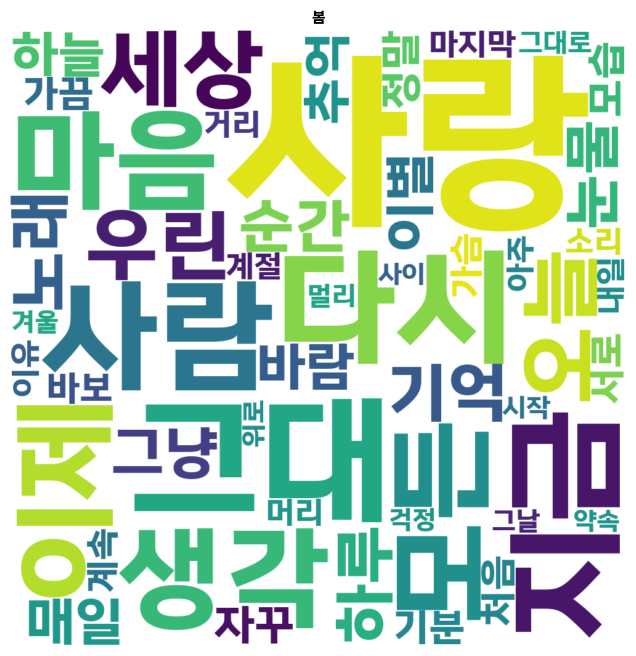

In [24]:
# 봄

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
spring = spring.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

spring['가사_명사'] = spring['가사'].astype(str).apply(extract_nouns)

all_nouns_spring = spring['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_spring = Counter(all_nouns_spring)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_spring.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('봄', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()

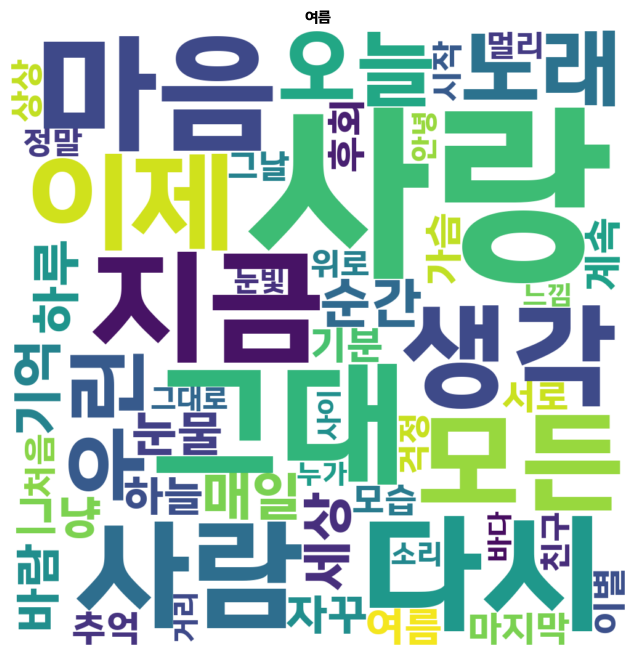

In [25]:
# 여름

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
summer = summer.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

summer['가사_명사'] = summer['가사'].astype(str).apply(extract_nouns)

all_nouns_summer = summer['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_summer = Counter(all_nouns_summer)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_summer.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('여름', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()

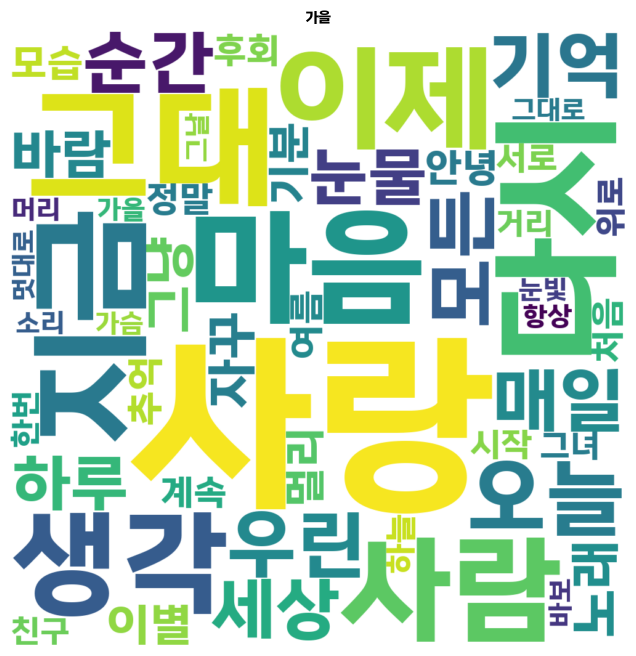

In [26]:
# 가을

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
fall = fall.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

fall['가사_명사'] = fall['가사'].astype(str).apply(extract_nouns)

all_nouns_fall = fall['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_fall = Counter(all_nouns_fall)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_fall.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('가을', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()

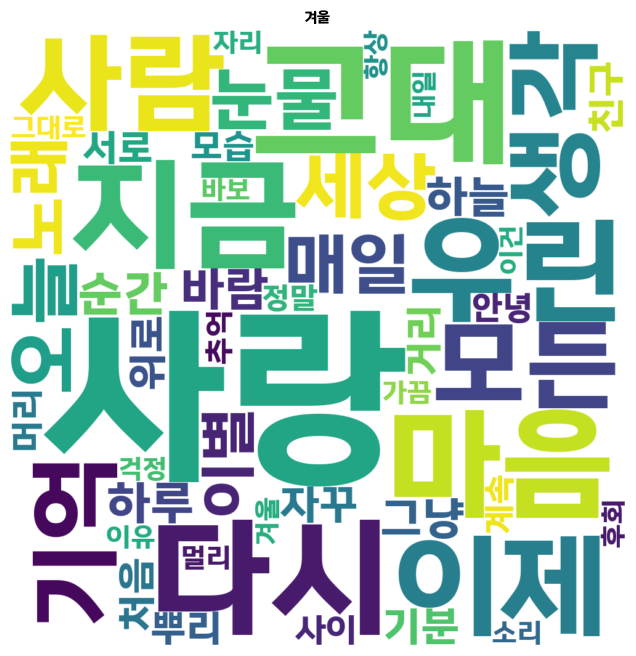

In [27]:
# 겨울

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
winter = winter.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

winter['가사_명사'] = winter['가사'].astype(str).apply(extract_nouns)

all_nouns_winter = winter['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_winter = Counter(all_nouns_winter)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_winter.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('겨울', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()